In [1]:
# importing different libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# loading mnist datasets
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[10].shape

(28, 28)

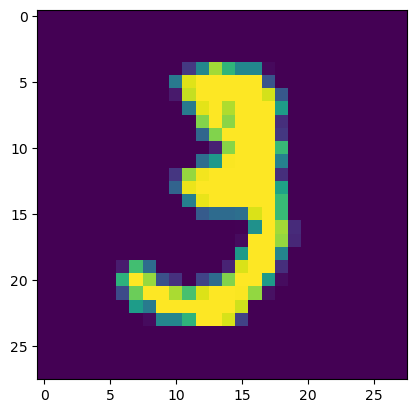

3


In [6]:
plt.imshow(X_train[10])
plt.show()
# print the corresponding label
print(Y_train[10])

In [7]:
# analysis of  image labels\rint
print(Y_test.shape)
print(Y_train.shape)

(10000,)
(60000,)


In [8]:
print(np.unique(Y_train))
print(np.unique(X_train))

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [9]:
# We can use this label as such or we can also use one hot encoding
X_train = X_train / 255
X_test = X_test / 255

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
# Building the neural Network

# Setting up layers of the neural networks

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3012 - accuracy: 0.9128
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1411 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1032 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0824 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0679 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0571 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0444 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.03

In [14]:
# Acurracy  on test data
loss, accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0955 - accuracy: 0.9739


In [15]:
# testing data accuracy = 97%

In [16]:
print(X_test.shape)

(10000, 28, 28)


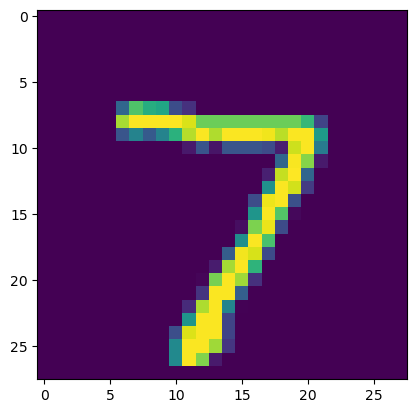

In [17]:
# first data point in first data
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
SAMPLE_PRED = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [20]:
SAMPLE_PRED.shape

(10000, 10)

In [21]:
print(SAMPLE_PRED[0])

[1.4252329e-03 3.9236559e-04 1.7967528e-01 9.9126631e-01 3.2981421e-04
 8.8117262e-03 2.2138028e-08 9.9999386e-01 4.2074407e-03 4.2434680e-01]


In [22]:
# The preidction probability of each class 
# concverting the prediction probability to class prediction
label_for_first_image = np.argmax(SAMPLE_PRED[0])
print(label_for_first_image)

7


In [23]:
# converting all the prediction probabilty to class label for test data point
y_pred_labels = [np.argmax(i) for i in SAMPLE_PRED]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
# Confusion matrix
conf_mat = confusion_matrix(Y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 960    0    2    2    2    2    7    1    3    1]
 [   1 1123    1    3    0    0    2    0    5    0]
 [   3    3 1003    6    1    0    1    8    7    0]
 [   0    0    2  987    0   10    0    5    4    2]
 [   1    1    3    0  958    3    4    1    0   11]
 [   3    1    1   14    1  853    1    1   12    5]
 [   6    2    2    1    3    2  938    0    4    0]
 [   0    7    9    6    1    0    0  994    2    9]
 [   4    0    2    9    5    4    2    4  942    2]
 [   2    3    1    2    9    2    2    5    3  980]], shape=(10, 10), dtype=int32)


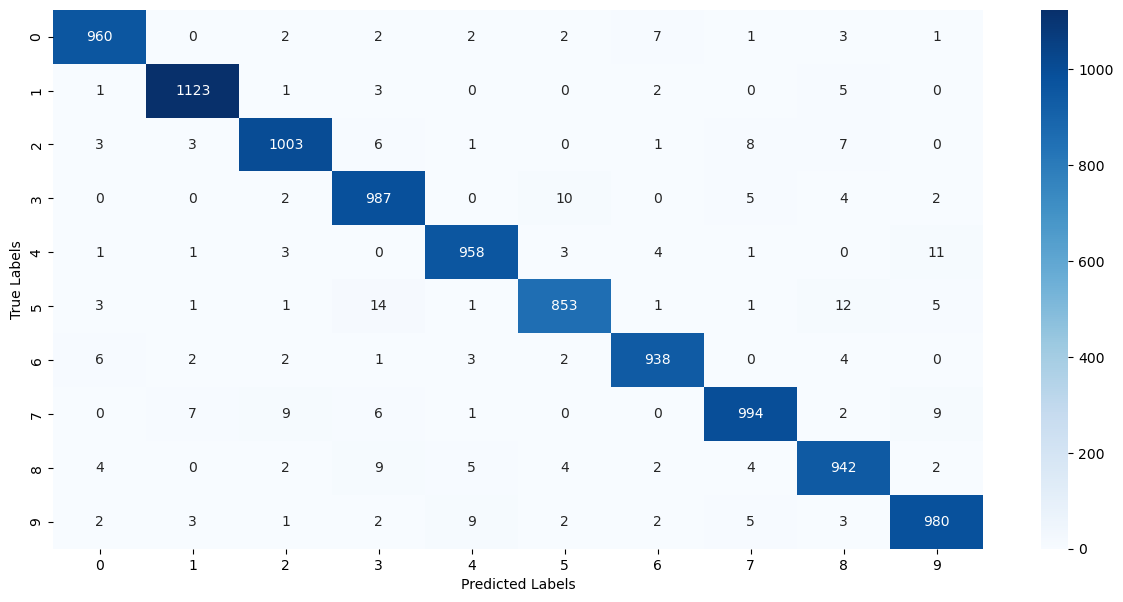

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [26]:
# Building the predective system
input_image_path = 'three.png'
input_image = cv2.imread(input_image_path)

In [27]:
input_image.shape

(320, 326, 3)

In [28]:
grayscale= cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [29]:
grayscale.shape

(320, 326)

In [30]:
input_img_resize = cv2.resize(grayscale,(28,28))

In [31]:
input_img_resize.shape

(28, 28)

In [32]:
input_img_resize = input_img_resize/255

In [33]:
image_reshapeed = np.reshape(input_img_resize,[1,28,28])

In [34]:
input_prediction = model.predict(image_reshapeed)
print(input_prediction)

1/1 [==============================] - 0s 25ms/step
[[8.1590731e-03 1.4628627e-02 4.2284814e-01 5.5569667e-01 3.2837788e-04
  1.7120972e-02 5.0415361e-01 7.7401586e-05 2.7458426e-01 2.6172244e-03]]


In [35]:
input_pred_label = np.argmax(input_prediction)

In [36]:
print(input_pred_label)

3


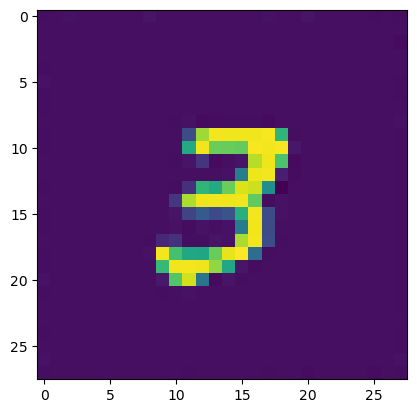

In [37]:
plt.imshow(input_img_resize)